## Staging 🏗️ - Keita

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [3]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [5]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [6]:
df.drop('Perimeter', axis=1, inplace=True)
df.drop('Major_Axis_Length', axis=1, inplace=True)
df.drop('Minor_Axis_Length', axis=1, inplace=True)
df.drop('Convex_Area', axis=1, inplace=True)
df.drop('Equiv_Diameter', axis=1, inplace=True)
df.drop('Extent', axis=1, inplace=True)
df.drop('Aspect_Ration', axis=1, inplace=True)

In [7]:
df.head()

,Area,Eccentricity,Solidity,Roundness,Compactness,Class
0,56276,0.7376,0.9902,0.8963,0.8207,Çerçevelik
1,76631,0.8275,0.9916,0.8440,0.7487,Çerçevelik
2,71623,0.8749,0.9857,0.7674,0.6929,Çerçevelik
3,66458,0.8123,0.9902,0.8486,0.7624,Çerçevelik
4,66107,0.8187,0.9850,0.8338,0.7557,Çerçevelik


In [8]:
df.iloc[:, -1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

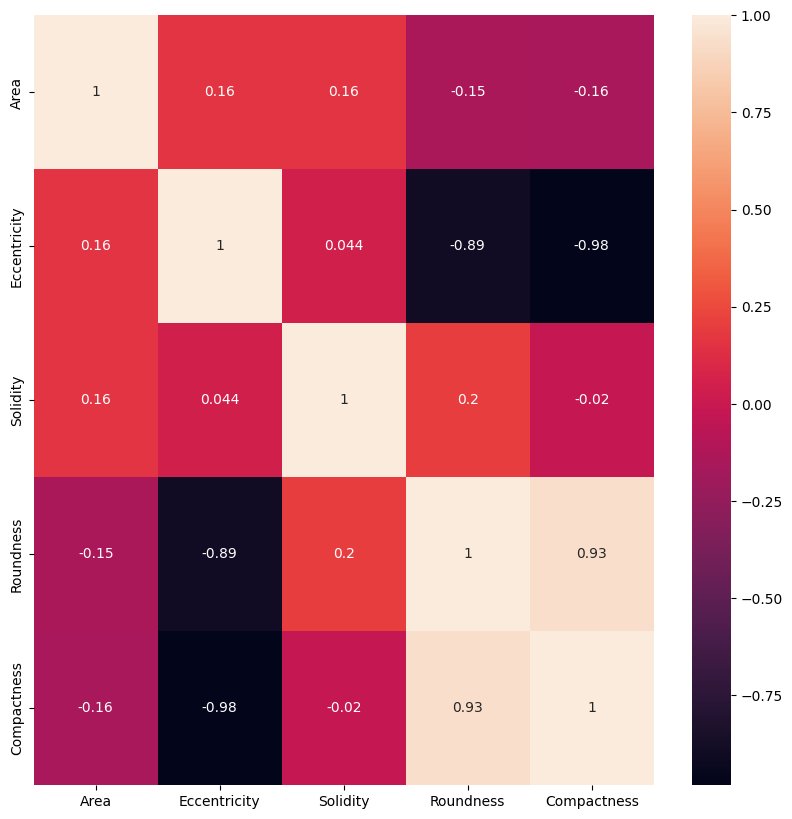

In [9]:
seedCorr = df.iloc[:, :-1].corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(seedCorr, annot=True, ax=ax)
plt.show()

In [10]:
X = df.drop('Class', axis=1) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print(X_train.columns)
print(X_train.shape)

Index(['Area', 'Eccentricity', 'Solidity', 'Roundness', 'Compactness'], dtype='object')
(2000, 5)


## Support Vector Models 📏📐 - Keita

In [13]:
model = SVC()

model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [14]:
svmPara = {'C':[0.1, 1, 10, 100, 1000],
             'gamma':['scale','auto'],
             'degree': [2, 3, 4, 5, 6, 7],
             'kernel':['rbf'] # We ran the kernels one by one to get their best hyperparameters' values
             }

In [15]:
#SCALED

gridSvm = GridSearchCV(model, svmPara, cv = 5, scoring = 'accuracy', n_jobs = -1)
gridSvm.fit(X_train_scaled, y_train)

print('Best accuracy score :', gridSvm.best_score_)

print('Best parameter :', gridSvm.best_params_)

Best accuracy score : 0.8935000000000001
Best parameter : {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [16]:
bestSvm = SVC(C = 0.1, degree = 2, gamma = 'scale', kernel = 'linear')
bestSvm.fit(X_train_scaled, y_train)
y_pred = bestSvm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.83      0.89      0.86       251
Ürgüp Sivrisi       0.88      0.82      0.85       249

     accuracy                           0.85       500
    macro avg       0.85      0.85      0.85       500
 weighted avg       0.85      0.85      0.85       500



In [17]:
bestSvm = SVC(C = 1, degree = 3, gamma = 'auto', kernel = 'poly')
bestSvm.fit(X_train_scaled, y_train)
y_pred = bestSvm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.75      0.95      0.84       251
Ürgüp Sivrisi       0.93      0.69      0.79       249

     accuracy                           0.82       500
    macro avg       0.84      0.82      0.82       500
 weighted avg       0.84      0.82      0.82       500



In [18]:
bestSvm = SVC(C = 100, degree = 2, gamma = 'scale', kernel = 'rbf')
bestSvm.fit(X_train_scaled, y_train)
y_pred = bestSvm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.86      0.88      0.87       251
Ürgüp Sivrisi       0.88      0.86      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



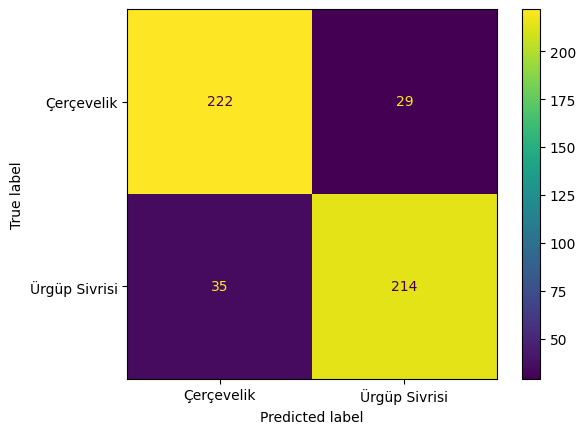

In [19]:
cm = confusion_matrix(y_test, y_pred)
dist = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bestSvm.classes_)
dist.plot()
plt.show()

## Random Forest 🌳🌳🌳🌳🌳 - Roy

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [21]:
rfcPara = {'criterion':['gini','entropy'],
            'max_depth':[2, 4, 6, 8, 10],
            'bootstrap': [True, False]}

In [22]:
# UNSCALED
gridRFC = GridSearchCV(RFC, rfcPara, cv=7, scoring = 'accuracy')
gridRFC.fit(X_train, y_train)
print(gridRFC.best_params_)
print(gridRFC.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10}
0.894503741872163


In [23]:
# SCALED 
gridRFC = GridSearchCV(RFC, rfcPara, cv=7, scoring = 'accuracy')
gridRFC.fit(X_train_scaled, y_train)
print(gridRFC.best_params_)
print(gridRFC.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8}
0.8945019892388313


In [24]:
# This is the best model (Scaled)
bestRFC = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 8)
bestRFC.fit(X_train_scaled, y_train)
y_pred1 = bestRFC.predict(X_test_scaled)
print(classification_report(y_test,y_pred1))

               precision    recall  f1-score   support

   Çerçevelik       0.85      0.89      0.87       251
Ürgüp Sivrisi       0.89      0.85      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



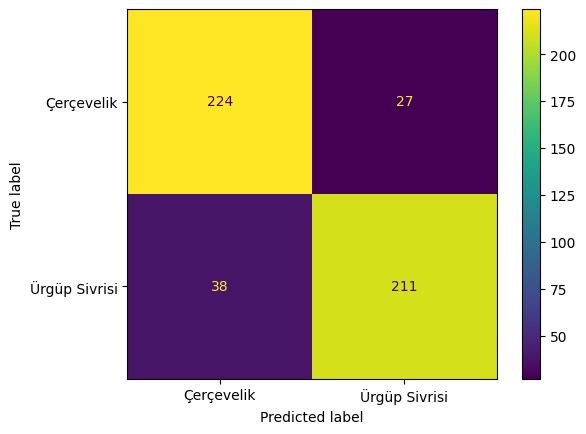

In [25]:
cm = confusion_matrix(y_test, y_pred1)
dist = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bestRFC.classes_)
dist.plot()
plt.show()

## Logistic Regression 📦📦 - Veronika

In [26]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [27]:
logrPara= {'C': [0.05, 0.02, 0.01, 0.1, 0.5, 1],
              'solver':['liblinear','saga'],
              'penalty': ['l1','l2'],
              'max_iter': [5000, 10000, 15000]}

In [28]:
# UNSCALED
gridLogR = GridSearchCV(LogR, logrPara, cv=5, scoring='accuracy', n_jobs = -1)
gridLogR.fit(X_train,y_train)
print(gridLogR.best_params_)
print(gridLogR.best_score_)

{'C': 0.5, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}
0.873


In [29]:
# SCALED
gridLogR = GridSearchCV(LogR, logrPara, cv=5, scoring='accuracy', n_jobs = -1)
gridLogR.fit(X_train_scaled,y_train)
print(gridLogR.best_params_)
print(gridLogR.best_score_)

{'C': 1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
0.8845000000000001


In [30]:
bestLogR = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga', max_iter = 5000)
bestLogR.fit(X_train_scaled,y_train)
y_pred2 = bestLogR.predict(X_test_scaled)
print(classification_report(y_test,y_pred2))

               precision    recall  f1-score   support

   Çerçevelik       0.82      0.89      0.85       251
Ürgüp Sivrisi       0.88      0.80      0.84       249

     accuracy                           0.85       500
    macro avg       0.85      0.85      0.85       500
 weighted avg       0.85      0.85      0.85       500



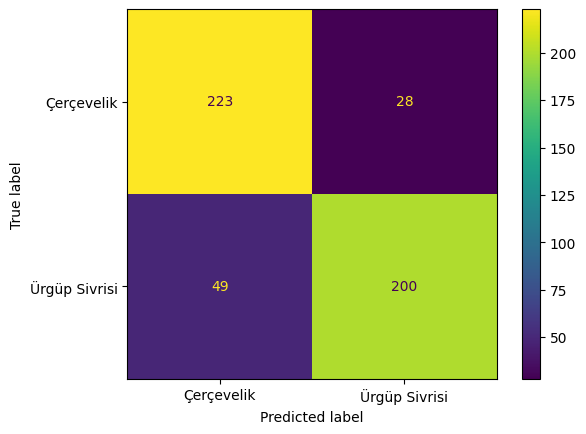

In [31]:
cmt = confusion_matrix(y_test, y_pred2)
dist = ConfusionMatrixDisplay(confusion_matrix = cmt, display_labels = bestLogR.classes_)
dist.plot()
plt.show()

## KNN 🏙️ - Viktória

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [33]:
knnPara = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'weights':['uniform', 'distance'],
         'metric':['euclidean', 'manhattan', 'minkowski']}

In [34]:
# UNSCALED
gridKnn = GridSearchCV(knn, knnPara, cv=7, scoring='accuracy')
gridKnn.fit(X_train, y_train)
print(gridKnn.best_params_)
print(gridKnn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.5945037418721629


In [35]:
# SCALED
gridKnn = GridSearchCV(knn, knnPara, cv=7, scoring='accuracy')
gridKnn.fit(X_train_scaled, y_train)
print(gridKnn.best_params_)
print(gridKnn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.8889952153110048


In [36]:
bestKnn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'uniform')
bestKnn.fit(X_train_scaled, y_train)

y_pred3 = bestKnn.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

               precision    recall  f1-score   support

   Çerçevelik       0.84      0.90      0.87       251
Ürgüp Sivrisi       0.89      0.83      0.86       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



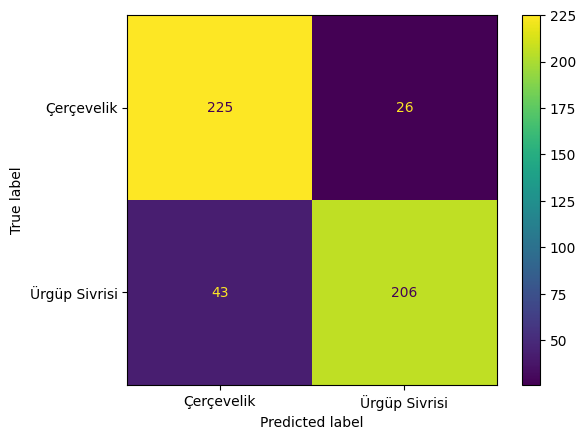

In [37]:
cmm = confusion_matrix(y_test, y_pred3)
dist = ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = bestKnn.classes_)
dist.plot()
plt.show()

## Summary 📝 - Roy

In [38]:
bestSvm = SVC(C = 100, degree = 2, gamma = 'scale', kernel = 'rbf')
bestSvm.fit(X_train_scaled,y_train)
y_pred = bestSvm.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.86      0.88      0.87       251
Ürgüp Sivrisi       0.88      0.86      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



In [39]:
# Best model, but only by a little compared to others

bestRFC = RandomForestClassifier(bootstrap = True,criterion = 'gini',max_depth = 8)
bestRFC.fit(X_train_scaled, y_train)
y_pred1 = bestRFC.predict(X_test_scaled)
print(classification_report(y_test, y_pred1))

               precision    recall  f1-score   support

   Çerçevelik       0.85      0.89      0.87       251
Ürgüp Sivrisi       0.89      0.85      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



In [40]:
bestLogR = LogisticRegression(C = 1,penalty = 'l1',solver = 'saga', max_iter = 5000)
bestLogR.fit(X_train_scaled, y_train)
y_pred2 = bestLogR.predict(X_test_scaled)
print(classification_report(y_test, y_pred2))

               precision    recall  f1-score   support

   Çerçevelik       0.82      0.89      0.85       251
Ürgüp Sivrisi       0.88      0.80      0.84       249

     accuracy                           0.85       500
    macro avg       0.85      0.85      0.85       500
 weighted avg       0.85      0.85      0.85       500



In [41]:
bestKnn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'uniform')
bestKnn.fit(X_train_scaled, y_train)

y_pred3 = bestKnn.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

               precision    recall  f1-score   support

   Çerçevelik       0.84      0.90      0.87       251
Ürgüp Sivrisi       0.89      0.83      0.86       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

